In [1]:
#Importing libraries, I have so many of them by default so just choose the ones that works for you
import numpy as np
import pandas as pd
from scipy import stats
import pickle
# Plotting libraries
!pip install gcsfs
!pip install vaex
!pip install scikit-learn numpy
!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
import tensorflow as tf
import vaex
# Sklearn libraries
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
# Filter warnings
warnings.filterwarnings('ignore') #filter warnings
# Show plots inline
%matplotlib inline
!pip install -U klib
import klib
!pip install matplotlib==3.1.3

ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/94/fa/8b319f3cef8adb9a9d02b44f3b6c6055f51c0560f70101152decefce9b2e/vaex-4.16.0-py3-none-any.whl (Caused by NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x000001E0B1E22EE0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))



ModuleNotFoundError: No module named 'vaex'

In [2]:
#load the dataset
df = pd.read_csv(r"D:\DATASET\2ND_NEW_ML-EdgeIIoT-dataset.csv")

In [3]:
df.head()

,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.syn,tcp.dstport,tcp.flags,tcp.flags.ack,tcp.len,tcp.seq,tcp.srcport,Attack_label,Attack_type
0,1,3108484685,52838,0,80,24,1,34,1,54518,1,DDoS_HTTP
1,1,2302303704,34322,0,80,24,1,38,1,54538,1,DDoS_HTTP
2,28,1389321969,60619,0,54622,16,1,0,1,80,1,DDoS_HTTP
3,33,2272282626,38986,0,54642,16,1,0,1,80,1,DDoS_HTTP
4,28,2940209540,47386,0,54646,16,1,0,1,80,1,DDoS_HTTP


<AxesSubplot:title={'center':'Class Distribution'}, ylabel='None'>

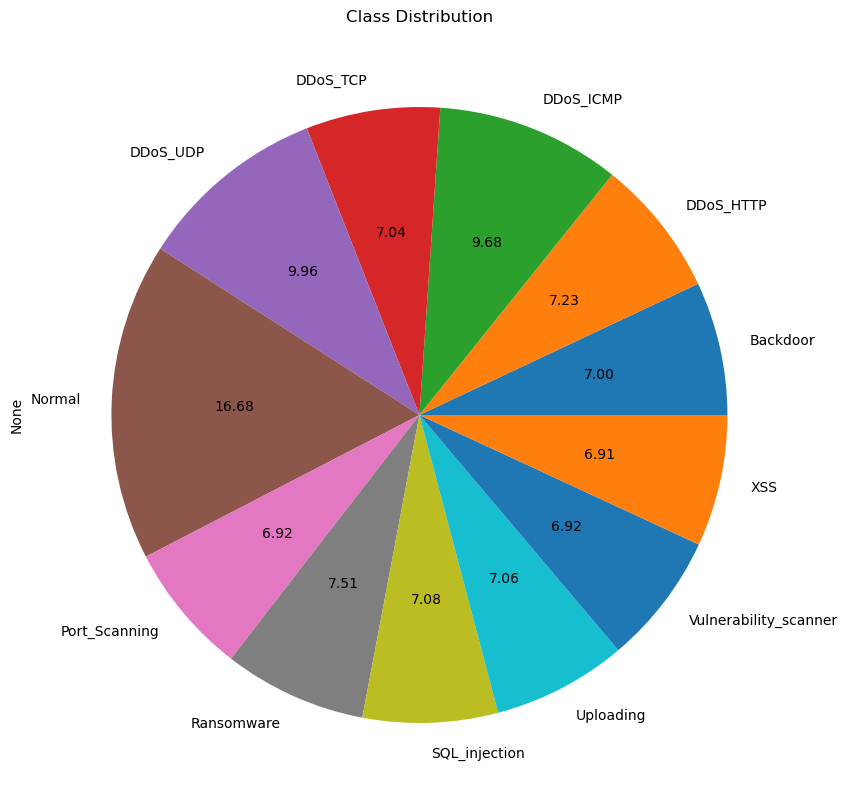

In [4]:
#visiualize the dataset
from matplotlib import pyplot as plt

plt.title("Class Distribution")
df.groupby("Attack_type").size().plot(kind='pie', autopct='%.2f', figsize=(20,10))

In [5]:
#shuffle rows of dataframe 
sampler=np.random.permutation(len(df))
data=df.take(sampler)
df.head()

,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.syn,tcp.dstport,tcp.flags,tcp.flags.ack,tcp.len,tcp.seq,tcp.srcport,Attack_label,Attack_type
0,1,3108484685,52838,0,80,24,1,34,1,54518,1,DDoS_HTTP
1,1,2302303704,34322,0,80,24,1,38,1,54538,1,DDoS_HTTP
2,28,1389321969,60619,0,54622,16,1,0,1,80,1,DDoS_HTTP
3,33,2272282626,38986,0,54642,16,1,0,1,80,1,DDoS_HTTP
4,28,2940209540,47386,0,54646,16,1,0,1,80,1,DDoS_HTTP


In [6]:
#split test and train
from sklearn.model_selection import train_test_split
X = df.drop(['Attack_type'], axis=1)
y = df.filter(['Attack_type'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import time

D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Cross-Validation Accuracy Scores:
[0.94211611 0.94495019 0.94108048 0.94400069 0.94365713 0.94408658
 0.94812334 0.94400069 0.94735034 0.94400069]
Mean Accuracy: 0.9443
Standard Deviation: 0.0020
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                       precision    recall  f1-score   support

             Backdoor       1.00      0.97      0.99      2048
            DDoS_HTTP       0.89      0.89      0.89      2076
            DDoS_ICMP       0.76      1.00      0.86      2827
             DDoS_TCP       1.00      1.00      1.00      2010
             DDoS_UDP       1.00      0.90      0.94      2896
               Normal       1.00      1.00      1.00      4854
        Port_Scanning       1.00      0.90      0.95      2024
           Ransomware       1.00      0.90      0.95      2230
        SQL_injection       0.95      0.91      0.93      2139
            Uploading       0.96      0.91      0.93      1990
Vulnerability_scanner       0.99      0.99      0.99      2030
                  XSS       0.89      0.92      0.91      1984

             accuracy                           0.95     29108
            macro avg       0.95      0.94      0.94     29108
         weighted avg       0.95      0.95      0.95 

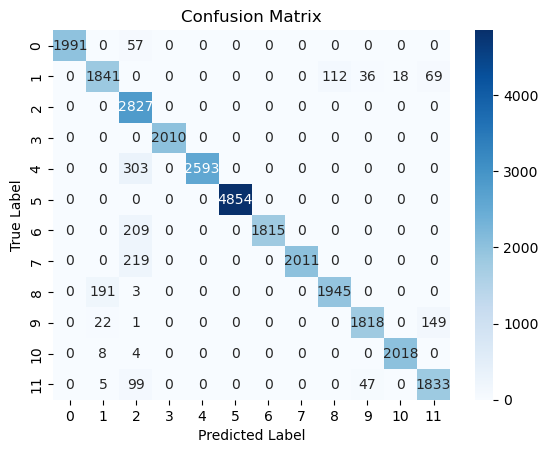

In [8]:
import lightgbm as lgb
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import time

start_time = time.time()

lgbm = lgb.LGBMClassifier(
    n_estimators=100,
    random_state=42,
    bagging_freq=5,
    bagging_fraction=0.75
)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(lgbm, X_train, y_train, cv=10, scoring='accuracy')

end_time = time.time()
computational_time = end_time - start_time

print("Cross-Validation Accuracy Scores:")
print(cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

# Fit the model on the entire training data
lgbm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lgbm.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate average detection time per sample
num_samples = len(X_test)
avg_detection_time = computational_time / num_samples

print(f"Computational time: {computational_time:.2f} seconds")
print(f"Average detection time per sample: {avg_detection_time:.6f} seconds")

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [9]:
##########################
#Explainability Codes with SHAP

In [10]:
import seaborn as sns
! pip install shap
import shap
shap.initjs()

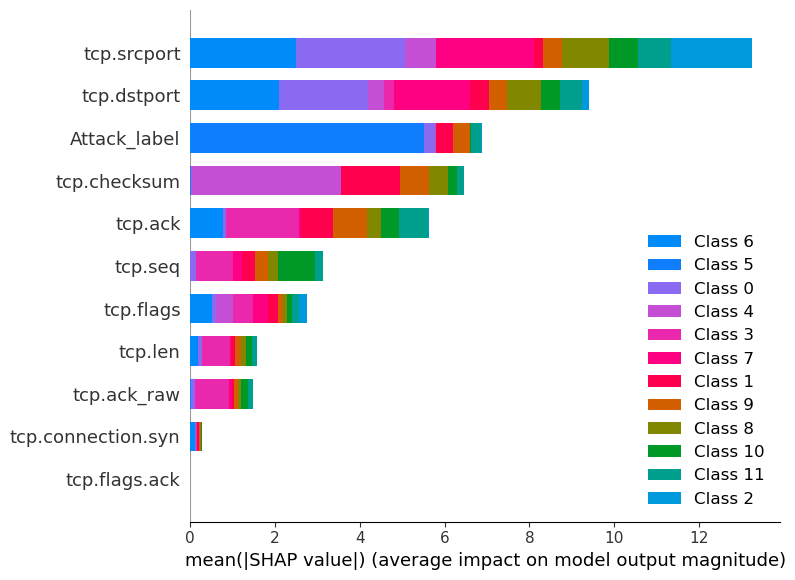

In [12]:
# Load the SHAP explainer
explainer = shap.TreeExplainer(lgbm)

# Calculate SHAP values for all samples in the test set
shap_values = explainer.shap_values(X_test)

# Use the summary plot to visualize the feature importance
shap.summary_plot(shap_values, X_test, plot_type='bar')

# Use the force plot to visualize the contribution of each feature for a particular prediction
# Select an index for the test set and generate a force plot for that sample
idx = 0

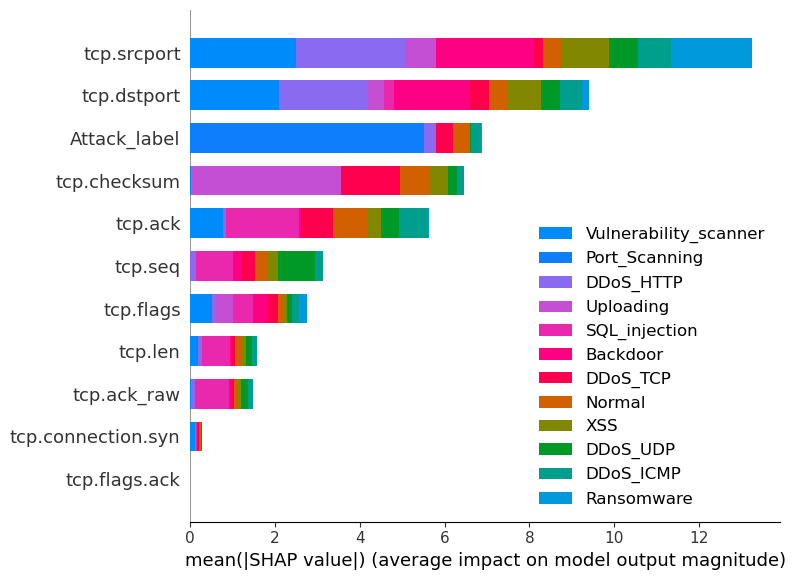

In [13]:
class_names = df['Attack_type'].unique().tolist()
shap.summary_plot(shap_values, X_test, class_names=class_names)


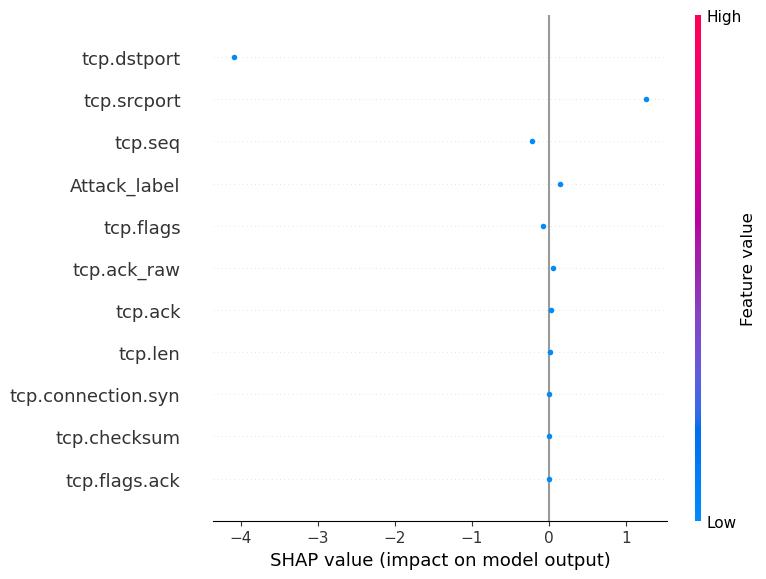

In [15]:
import shap

# Load the SHAP explainer
explainer = shap.TreeExplainer(lgbm)

# Selecting a single test data or row from dataset
idx = 0
sample = X_test.iloc[[idx]]

# Calculate SHAP values for the selected sample
shap_values = explainer.shap_values(sample)

# Use the summary plot to visualize the feature importance
shap.summary_plot(shap_values[0], sample)

# Use the force plot to visualize the contribution of each feature for the selected prediction
shap.force_plot(explainer.expected_value[0], shap_values[0], sample)
